In [52]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [53]:
# Path to the dataset
dataset_path = 'data/'

# Initialize data and labels lists
data = []
labels = []

# Define the image size (must match the size used during data collection)
img_size = 224

# Loop through the subfolders in the dataset directory
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        # Loop through the images in each folder
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)

            # Read the image
            image = cv2.imread(image_path)
            # Resize the image to match the training size
            image = cv2.resize(image, (img_size, img_size))
            # Convert the image to a numpy array
            image = img_to_array(image)
            # Normalize the image
            image = image / 255.0

            # Append the image and corresponding label
            data.append(image)
            labels.append(label)

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Print the shape of the data to confirm
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")


Data shape: (336, 224, 224, 3)
Labels shape: (336,)


In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()
labels = le.fit_transform(labels)  # Convert labels to numerical values

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(os.listdir(dataset_path)))

print(f"Encoded labels shape: {labels.shape}")


Encoded labels shape: (336, 38)


In [55]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (268, 224, 224, 3)
Testing data shape: (68, 224, 224, 3)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutio
# nal layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth convolutional layer
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(len(os.listdir(dataset_path)), activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


c:\Users\yuvip\OneDrive\Desktop\project\handsign\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,142,182 (31.06 MB)

 Trainable params: 8,142,182 (31.06 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test) )


Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 963ms/step - accuracy: 0.0365 - loss: 3.6892 - val_accuracy: 0.1029 - val_loss: 3.5942
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 857ms/step - accuracy: 0.0895 - loss: 3.5356 - val_accuracy: 0.1029 - val_loss: 3.3089
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 911ms/step - accuracy: 0.1023 - loss: 3.4344 - val_accuracy: 0.1471 - val_loss: 3.5272
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 875ms/step - accuracy: 0.1200 - loss: 3.4034 - val_accuracy: 0.2206 - val_loss: 3.0714
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 853ms/step - accuracy: 0.1763 - loss: 3.0224 - val_accuracy: 0.3235 - val_loss: 2.4758
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 856ms/step - accuracy: 0.3982 - loss: 2.2292 - val_accuracy: 0.5735 - val_loss: 1.6631
Epoch 7/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 841ms/step - accuracy: 0.5848 - loss: 1.5624 - val_accuracy: 0.7941 - val_loss: 0.8509
Epoch 8/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 931ms/step - accuracy: 0.7072 - loss: 0.9014 - val_accuracy: 0.9118 - val_loss: 0.3977

In [58]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9168 - loss: 0.3721
Test accuracy: 91.18%


In [59]:
import os

# Ensure the 'Model' directory exists
model_dir = 'Model'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)  # Create the 'Model' directory if it doesn't exist

# Save the model to 'Model/keras_model.h5'
model.save(os.path.join(model_dir, 'keras_model.keras'))
print("Model saved at Model/keras_model.keras!")


Model saved at Model/keras_model.keras!


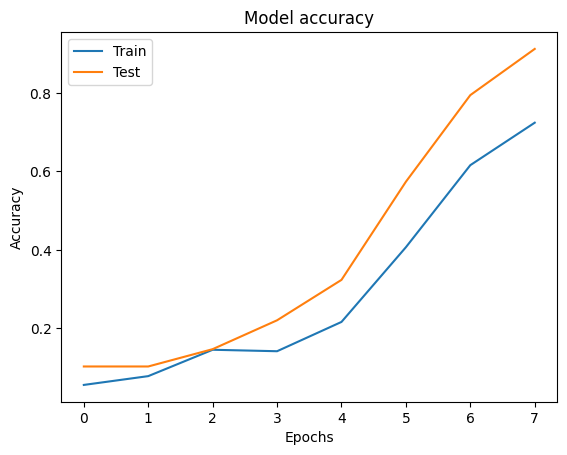

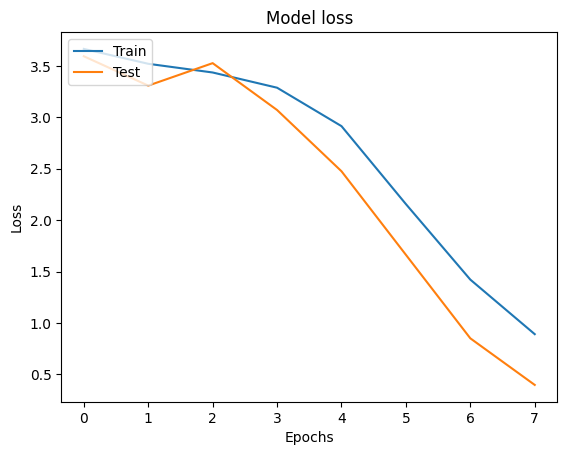

In [60]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
